In [1]:
import numpy as np
import pandas as pd
import random
import math

from arms.bernoulli import BernoulliArm
%matplotlib inline

In [2]:
class UCB1():
    def __init__(self, counts, values):
        self.counts = counts
        self.values = values
        return
  
    def initialize(self, n_arms):
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]
        return
  
    def select_arm(self):
        n_arms = len(self.counts)
        for arm in range(n_arms):
            if self.counts[arm] == 0:
                return arm

        ucb_values = [0.0 for arm in range(n_arms)]
        total_counts = sum(self.counts)
        for arm in range(n_arms):
            bonus = math.sqrt((2 * math.log(total_counts)) / float(self.counts[arm]))
            ucb_values[arm] = self.values[arm] + bonus
        return np.argmax(ucb_values)
  
    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]

        value = self.values[chosen_arm]
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] = new_value
        return

In [3]:
random.seed(1)
means = [0.1, 0.1, 0.1, 0.1, 0.9]
n_arms = len(means)
random.shuffle(means)
arms = list(map(lambda mu: BernoulliArm(mu), means))
best_arm = np.argmax(means)
print("Best arm is " + str(best_arm))

Best arm is 2


In [4]:
from testing_framework.tests import *

algo = UCB1([], [])
algo.initialize(n_arms)
results = test_algorithm(algo, arms, 5000, 250)
dataframe = pd.DataFrame(np.array(results).T,columns=["Sim", "T", "ChosenArm", "Reward", "CumulativeReward"])

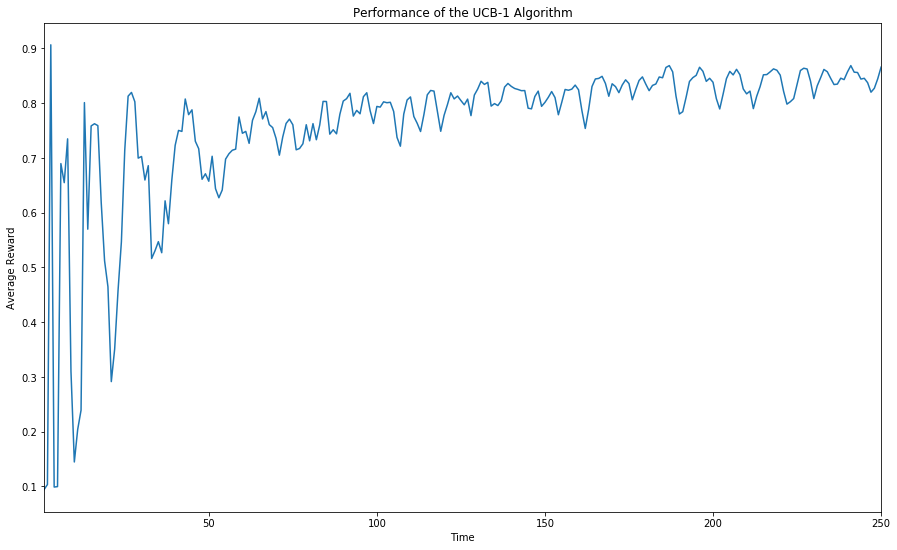

In [5]:
ax = dataframe.groupby("T").mean()['Reward'].plot(figsize=(15,9))
ax.set_title("Performance of the UCB-1 Algorithm")
ax.set_ylabel('Average Reward');
ax.set_xlabel('Time');

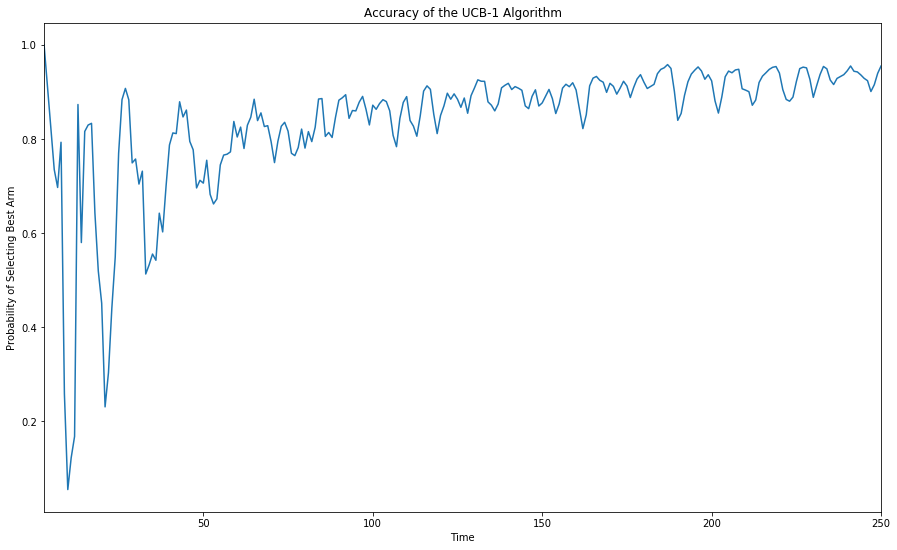

In [6]:
df_grouped = dataframe.groupby(["T","ChosenArm"]).count()/dataframe.Sim.max()
df_grouped = df_grouped.reset_index()
ax = df_grouped[df_grouped['ChosenArm'] == float(best_arm)].set_index('T')['Reward'].plot(figsize=(15,9))
ax.set_title("Accuracy of the UCB-1 Algorithm")
ax.set_ylabel('Probability of Selecting Best Arm');
ax.set_xlabel('Time');

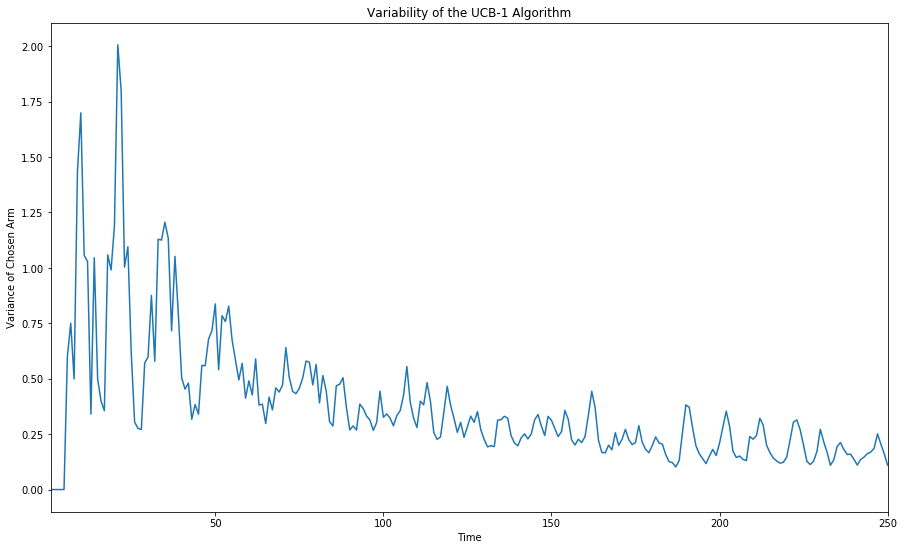

In [7]:
ax = dataframe.groupby("T").var()['ChosenArm'].plot(figsize=(15,9))
ax.set_title("Variability of the UCB-1 Algorithm")
ax.set_ylabel('Variance of Chosen Arm');
ax.set_xlabel('Time');

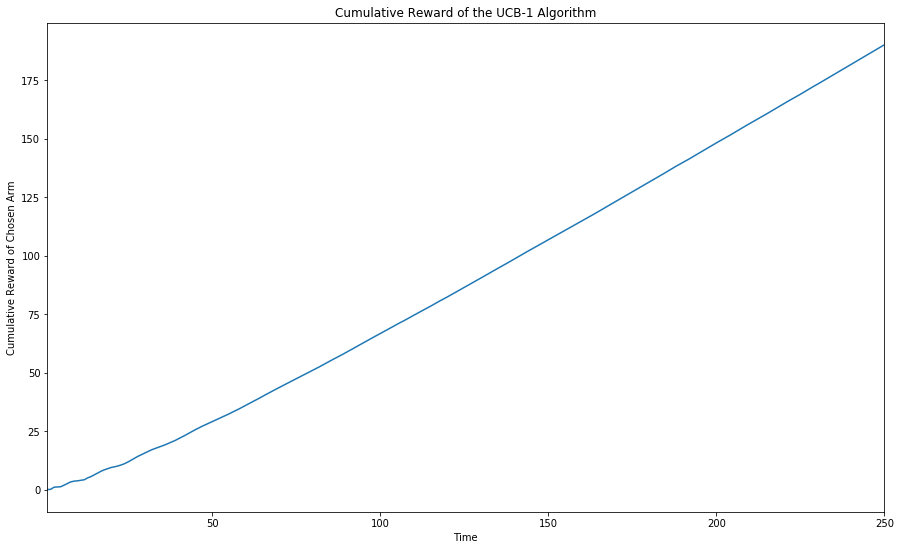

In [8]:
ax = dataframe.groupby("T").mean()['CumulativeReward'].plot(figsize=(15,9))
ax.set_title("Cumulative Reward of the UCB-1 Algorithm")
ax.set_ylabel('Cumulative Reward of Chosen Arm');
ax.set_xlabel('Time');

In [ ]:
dataframe.to_csv("UCB_results.csv",index=None)